<a href="https://colab.research.google.com/github/RijenSianturi/AI_learn/blob/master/ReadDataUsingGoogleColabs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#install depedency untuk google location
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#untuk depedency pengolahan data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[16,10]
import seaborn as sns

#depedency untuk model prediksi menggunakan xgboost dan sklearn
from sklearn.model_selection import train_test_split
import xgboost as xgb

%matplotlib inline
plt.rcParams['axes.unicode_minus']=False

In [0]:
#Authtenticate
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#Mengambil set data dari google drive
train_downloaded = drive.CreateFile({'id': '1P8iPaXLd3GSMnsgKxQ_rT_c_qbAMTUgX'})
train_downloaded.GetContentFile('train.csv')
test_downloaded = drive.CreateFile({'id': '1AhtKG6fVpmf5uK7W5YhvnxZbZxqjIZf4'})
test_downloaded.GetContentFile('test.csv')

df_train =pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [12]:
df_train.head(3)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124


<function matplotlib.pyplot.show>

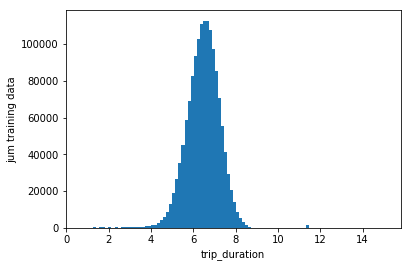

In [14]:
#proses data
#Berapa lama rata rata trip duration dari taxi

df_train['trip_duration'] =np.log(df_train['trip_duration'].values + 1)
plt.hist(df_train['trip_duration'].values, bins=100)
plt.xlabel('trip_duration')
plt.ylabel('jum training data')
plt.show

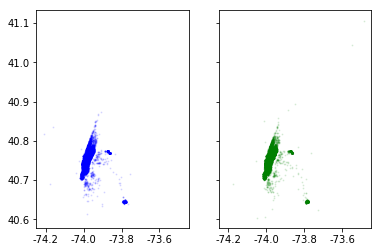

In [27]:
#selanjutnya akan dilihat overlap anatara test dan trainning data, kita mencoba untuk membuat map berdasarkan data pickup
N = 10000 
city_long_border =[-75,-75]
city_lat_border =[40,40]
fig,ax= plt.subplots(ncols=2,sharex=True, sharey=True)
ax[0].scatter(df_train['pickup_longitude'].values[:N],
             df_train['pickup_latitude'].values[:N],
             color='blue', s=1, label='train',alpha=0.1)
ax[1].scatter(df_test['pickup_longitude'].values[:N],
             df_test['pickup_latitude'].values[:N],
             color='green', s=1, label='test',alpha=0.1)

plt.show()

In [30]:
#train_model
feature_names=list(df_train.columns)
y = np.log(df_train['trip_duration'].values + 1)
Xtr,Xtv,ytr, ytv = train_test_split(df_train[feature_names].values, y,df_test)

model = xgb_train('default', df_train)

ValueError: ignored